In [132]:
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [133]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
m = np.shape(X)[0]
n = np.shape(X)[1]

In [134]:
print (m, n)

569 30


In [135]:
X = (X - X.min()) / (X.max() - X.min())

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [137]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [138]:
def init_theta(features):
    theta = np.zeros([features, 1])
    theta0 = 0.0
    return theta, theta0

In [139]:
def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h

In [140]:
def forward_propagation(theta, theta0, X_train, y_train):
    z = np.dot(theta.T, X_train) + theta0
    h = sigmoid(z)
    n = X_train.shape[1]
    cost = - y_train * np.log(h) - (1 - y_train) * np.log(1 - h)
    cost = (np.sum(cost)) / n
    # backward propagation
    derivative_weight = (np.dot(X_train, ((h - y_train).T))) / n 
    derivative_bias = np.sum(h - y_train) / n
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [141]:
def update(theta, theta0, X_train, y_train, alpha, epochs):
    cost_list = []
    cost_list_tenth = [] # tracking tenth cost
    index = []
    
    for i in range(epochs):
        cost, gradients = forward_propagation(theta, theta0, X_train, y_train)
        cost_list.append(cost)
        
        theta = theta - alpha * gradients["derivative_weight"]
        theta0 = theta0 - alpha * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list_tenth.append(cost)
            index.append(i)
            #print ("Cost after epochs % i: % f" %(i, cost)) 
            
    parameters = {"weight": theta, "bias": theta0}
    plt.plot(index, cost_list_tenth)
        
    return parameters, gradients, cost_list

In [142]:
def predict(theta, theta0, X_test):
    z = sigmoid(np.dot(theta.T, X_test) + theta0)
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    
    return y_prediction

In [143]:
def logistic_regression(X_train, y_train, X_test, y_test, alpha, epochs):
    m = X_train.shape[0]
    theta, theta0 = init_theta(m)
    
    parameters, gradients, cost_list = update(theta, theta0, X_train, y_train, alpha, epochs)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], X_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)
    
    print ("Train accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print ("Test accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Train accuracy: 88.82%
Test accuracy: 93.02%


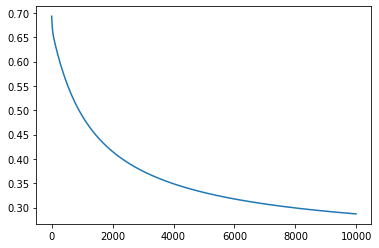

In [144]:
logistic_regression(X_train, y_train, X_test, y_test, alpha = 0.1, epochs = 10000)